## PYRCO MACHINE LEARNING MODEL
GOALS: 
- REDUCE TIME
- IMPROVE AMOUNT OF M2 OF PAINTING
- PREVENT REPARINGS IN MACHINES
- FORESEE PROBLEMS AND SOLUTIONS
- IMPROVE THE REVENUE OF THE COMPANY $/M2

In [549]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import datetime as dt

In [550]:
## Import dataset from excel
import pandas as pd

paint_file = "C:/Users/chris/OneDrive/Desktop/Cursos y Bootcamps de Programación/Machine_Learning/Projects_HO_ML/ML_BOOTCAMP_PROJECT/Painting_Tracking_ML_model.xlsx"
paint_df = pd.read_excel(paint_file, header=37)
paint_df

,Unnamed: 0,Ítem,Ubicación,Paño,Ejes,L,N,almas pintadas,h efec alma(mm),A,...,F,Total Area,Unidad,Realizado 1/0,Cantidad Ejecutada Cuacho Clorado,Fecha de Progreso Caucho Clorado,Realizado 1/0.1,Cantidad Ejecutada Intumescente,Fecha de Progreso Intumescente,Unnamed: 25
0,NaN,VP-14 I1100×350×15×20,Nivel +12.00 -Bloque 4,1.0,"34(B-C),33(B-C)",3.94,2.0,1.0,1060,1.060,...,1.745,13.75,m2,1.0,13.75,2025-06-10,1.0,13.75,2025-06-23,0
1,NaN,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,33-34(C ),12.25,1.0,2.0,720,1.440,...,2.080,25.48,m2,1.0,25.48,2025-06-10,1.0,25.48,2025-06-23,0
2,NaN,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,33(C-D),9.3,1.0,2.0,720,1.440,...,2.080,19.34,m2,1.0,19.34,2025-06-10,1.0,19.34,2025-06-23,0
3,NaN,VP-8 I750×220×10×15,Nivel +12.00 -Bloque 4,1.0,34(C-D),9.3,1.0,1.0,720,0.720,...,1.150,10.70,m2,1.0,10.70,2025-06-10,1.0,10.70,2025-06-23,0
4,NaN,VP-1 I500×200×8×12,Nivel +12.00 -Bloque 4,1.0,33-34(C-D)(1),1.9,1.0,2.0,476,0.952,...,1.536,2.92,m2,1.0,2.92,2025-06-10,1.0,2.92,2025-06-23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,NaN,VP-8 I750×220×10×15,Nivel +23.52 -Bloque 1,8.0,1(F-G),6.3,1.0,2.0,720,1.440,...,2.080,13.10,m2,1.0,13.10,2025-07-14,1.0,13.10,2025-07-21,NaN
1109,NaN,VP-8 I750×220×10×15,Nivel +23.52 -Bloque 1,8.0,2(F-G),6.3,1.0,2.0,720,1.440,...,2.080,13.10,m2,1.0,13.10,2025-07-14,1.0,13.10,2025-07-16,NaN
1110,NaN,VP-1 I500×200×8×12,Nivel +23.52 -Bloque 1,8.0,1'(F-G),6.7,1.0,2.0,476,0.952,...,1.536,10.29,m2,1.0,10.29,2025-07-14,1.0,10.29,2025-07-22,NaN
1111,NaN,B-1 I500×200×6×8,Nivel +23.52 -Bloque 1,8.0,1-2(F-G),9.25,4.0,2.0,484,0.968,...,1.556,57.57,m2,1.0,57.57,2025-07-15,1.0,57.57,2025-07-16,NaN


<Axes: >

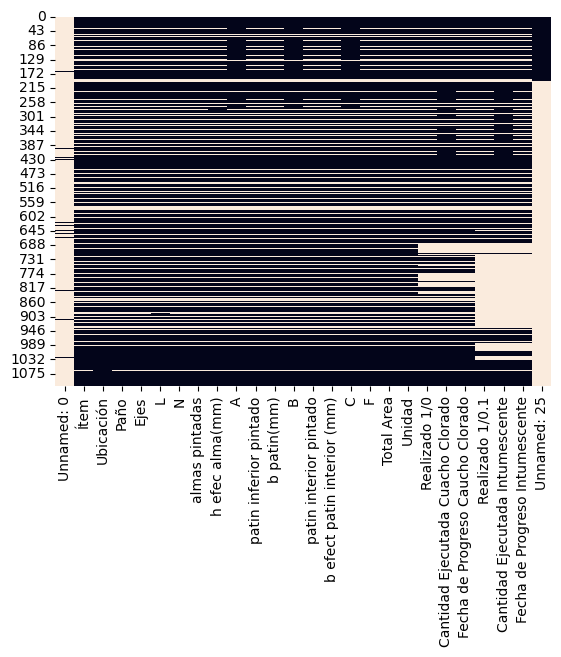

In [551]:
## Heatmap that represents how was made the dataset
sns.heatmap(paint_df.isnull(),cbar=False)

In [552]:
paint_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Unnamed: 0                         44 non-null     object        
 1   Ítem                               874 non-null    object        
 2   Ubicación                          883 non-null    object        
 3   Paño                               874 non-null    float64       
 4   Ejes                               874 non-null    object        
 5   L                                  875 non-null    object        
 6   N                                  874 non-null    float64       
 7   almas pintadas                     872 non-null    float64       
 8   h efec alma(mm)                    873 non-null    object        
 9   A                                  906 non-null    float64       
 10  patin inferior pintado             8

In [553]:
paint_df.drop(paint_df.columns[[0,3,9,12,15,16,18,19,22,25]],axis=1, inplace=True)


In [554]:
paint_df.isnull().sum()

Ítem                                 239
Ubicación                            230
Ejes                                 239
L                                    238
N                                    239
almas pintadas                       241
h efec alma(mm)                      240
patin inferior pintado               241
b patin(mm)                          241
patin interior pintado               241
b efect patin interior (mm)          241
Total Area                           239
Cantidad Ejecutada Cuacho Clorado    276
Fecha de Progreso Caucho Clorado     298
Cantidad Ejecutada Intumescente      423
Fecha de Progreso Intumescente       454
dtype: int64

In [555]:
paint_df.dropna(inplace=True)
paint_df.info()
pd.unique(paint_df['L'])

<class 'pandas.core.frame.DataFrame'>
Index: 657 entries, 0 to 1112
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Ítem                               657 non-null    object        
 1   Ubicación                          657 non-null    object        
 2   Ejes                               657 non-null    object        
 3   L                                  657 non-null    object        
 4   N                                  657 non-null    float64       
 5   almas pintadas                     657 non-null    float64       
 6   h efec alma(mm)                    657 non-null    object        
 7   patin inferior pintado             657 non-null    float64       
 8   b patin(mm)                        657 non-null    float64       
 9   patin interior pintado             657 non-null    float64       
 10  b efect patin interior (mm)        657 non

array([3.94, 12.25, 9.3, 1.9, 3.9, 13, 10, 1.55, 15.25, 16, 12.45, 6.3,
       1.91, 1.68, 8.35, 9, 12.4, 1.94, 5.6, 5, 2.8, 5.3, 9.28, 9.25, 8.4,
       9.4, 8.1, 8.33, 8.45, 0.52, 5.17, 5.24, 2.7, 3.3, 3.6, 10.5, 4.6,
       6.35, 12.3, 1.75, 3, 1.2, 3.35, 1.45, 1.6, 2.45, 1.25, 1.7, 12.5,
       8.2, 1.53, 2, 1, 6.45, 3.65, 4.2, 9.2, 5.7, 2.5, 9.55, 4.3, 4.05,
       8.55, 4.1, 5.18, 3.4, 3.7, 0.5, 3.2, 0.75, 3.55, 3.25, 7, 2.9,
       9.75, 12.41, 9.5, 1.8, 4, 12.35, 9.6, 8, 0.6, 7.9, 7.75, 11.5,
       9.15, 1.5, 10.25, 15.2, 9.33, 9.1, 1.3, 5.4, 6.7, 6, 8.5, 4.45,
       7.45, 2.4, 4.15, 9.8, 8.8, 1.05, 6.2, 8.48, 15.4, 1.21],
      dtype=object)

In [556]:
# Turning discrete columns into continous samples
paint_df['L'] = pd.to_numeric(paint_df['L'], errors='coerce')
paint_df['h efec alma(mm)'] = pd.to_numeric(paint_df['h efec alma(mm)'], errors='coerce')
#Duplicated data#
paint_df.duplicated(keep=False).value_counts()



False    657
Name: count, dtype: int64

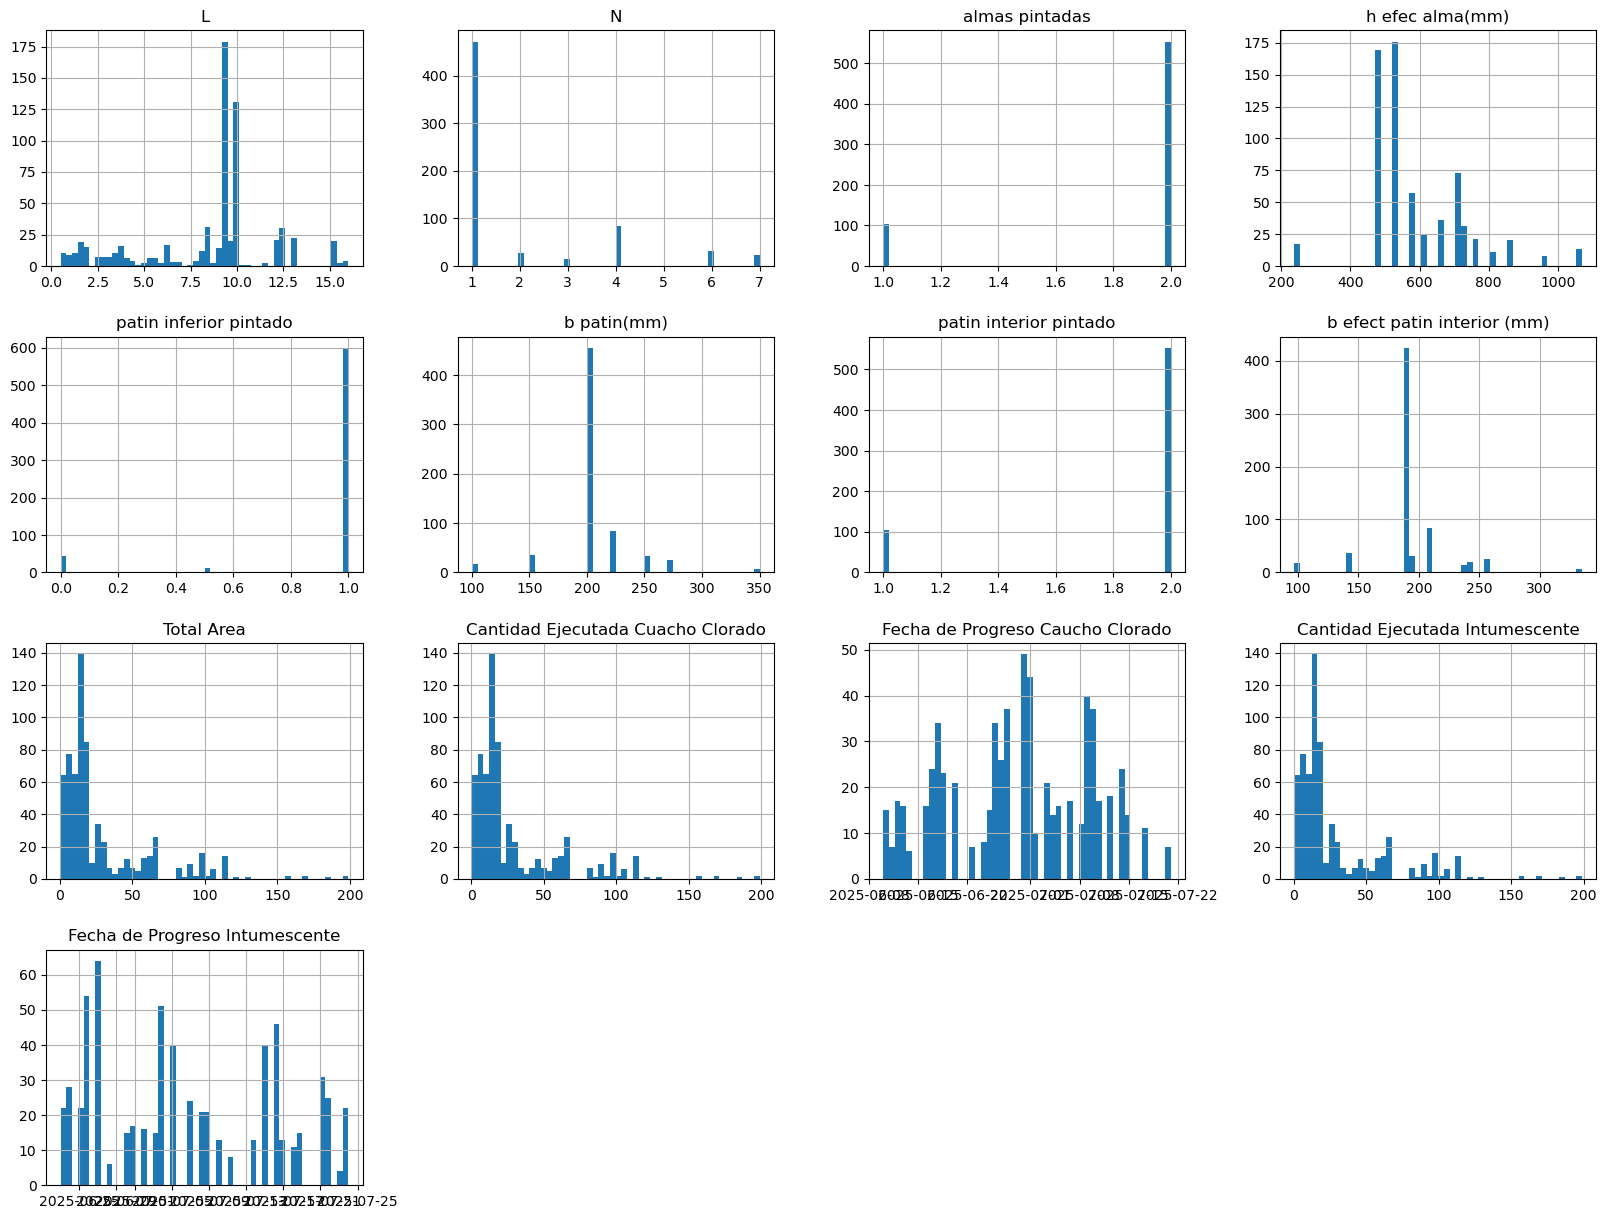

In [557]:
## Some graphic information
paint_df.hist(bins=50 , figsize=(20,15))
plt.show()

In [558]:
    from sklearn.preprocessing import LabelEncoder
    import numpy as np

    labels = paint_df['Ubicación']
    encoder = LabelEncoder()
    encoded_labels = encoder.fit_transform(labels)
    labels_1 = paint_df['Ítem']
    encoder_1 = LabelEncoder()
    encoded_labels_1 = encoder_1.fit_transform(labels_1)
    labels_2 = paint_df['Ejes']
    encoder_2 = LabelEncoder()
    encoded_labels_2 = encoder_2.fit_transform(labels_2)
    print(np.argsort(np.unique(encoded_labels)))
    print(np.argsort(np.unique(encoded_labels_1)))
   


[0 1 2 3 4 5 6 7]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


In [559]:
## Replace the columns in a new dataset 

In [560]:
paint_df_model=paint_df.copy()
paint_df_model['Ítem']= encoded_labels_1
paint_df_model['Ubicación']= encoded_labels
paint_df_model.drop(paint_df_model.columns[2],axis=1, inplace=True)
paint_df_model


,Ítem,Ubicación,L,N,almas pintadas,h efec alma(mm),patin inferior pintado,b patin(mm),patin interior pintado,b efect patin interior (mm),Total Area,Cantidad Ejecutada Cuacho Clorado,Fecha de Progreso Caucho Clorado,Cantidad Ejecutada Intumescente,Fecha de Progreso Intumescente
0,10,3,3.94,2.0,1.0,1060,1.0,350.0,1.0,335.0,13.75,13.75,2025-06-10,13.75,2025-06-23
1,20,3,12.25,1.0,2.0,720,1.0,220.0,2.0,210.0,25.48,25.48,2025-06-10,25.48,2025-06-23
2,20,3,9.30,1.0,2.0,720,1.0,220.0,2.0,210.0,19.34,19.34,2025-06-10,19.34,2025-06-23
3,20,3,9.30,1.0,1.0,720,1.0,220.0,1.0,210.0,10.70,10.70,2025-06-10,10.70,2025-06-23
4,6,3,1.90,1.0,2.0,476,1.0,200.0,2.0,192.0,2.92,2.92,2025-06-10,2.92,2025-06-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,20,6,6.30,1.0,2.0,720,1.0,220.0,2.0,210.0,13.10,13.10,2025-07-14,13.10,2025-07-21
1109,20,6,6.30,1.0,2.0,720,1.0,220.0,2.0,210.0,13.10,13.10,2025-07-14,13.10,2025-07-16
1110,6,6,6.70,1.0,2.0,476,1.0,200.0,2.0,192.0,10.29,10.29,2025-07-14,10.29,2025-07-22
1111,0,6,9.25,4.0,2.0,484,1.0,200.0,2.0,194.0,57.57,57.57,2025-07-15,57.57,2025-07-16


In [561]:
paint_df_model['diff_days'] = (paint_df_model['Fecha de Progreso Intumescente'] - paint_df_model['Fecha de Progreso Caucho Clorado']).dt.days
paint_df_model

,Ítem,Ubicación,L,N,almas pintadas,h efec alma(mm),patin inferior pintado,b patin(mm),patin interior pintado,b efect patin interior (mm),Total Area,Cantidad Ejecutada Cuacho Clorado,Fecha de Progreso Caucho Clorado,Cantidad Ejecutada Intumescente,Fecha de Progreso Intumescente,diff_days
0,10,3,3.94,2.0,1.0,1060,1.0,350.0,1.0,335.0,13.75,13.75,2025-06-10,13.75,2025-06-23,13
1,20,3,12.25,1.0,2.0,720,1.0,220.0,2.0,210.0,25.48,25.48,2025-06-10,25.48,2025-06-23,13
2,20,3,9.30,1.0,2.0,720,1.0,220.0,2.0,210.0,19.34,19.34,2025-06-10,19.34,2025-06-23,13
3,20,3,9.30,1.0,1.0,720,1.0,220.0,1.0,210.0,10.70,10.70,2025-06-10,10.70,2025-06-23,13
4,6,3,1.90,1.0,2.0,476,1.0,200.0,2.0,192.0,2.92,2.92,2025-06-10,2.92,2025-06-23,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,20,6,6.30,1.0,2.0,720,1.0,220.0,2.0,210.0,13.10,13.10,2025-07-14,13.10,2025-07-21,7
1109,20,6,6.30,1.0,2.0,720,1.0,220.0,2.0,210.0,13.10,13.10,2025-07-14,13.10,2025-07-16,2
1110,6,6,6.70,1.0,2.0,476,1.0,200.0,2.0,192.0,10.29,10.29,2025-07-14,10.29,2025-07-22,8
1111,0,6,9.25,4.0,2.0,484,1.0,200.0,2.0,194.0,57.57,57.57,2025-07-15,57.57,2025-07-16,1


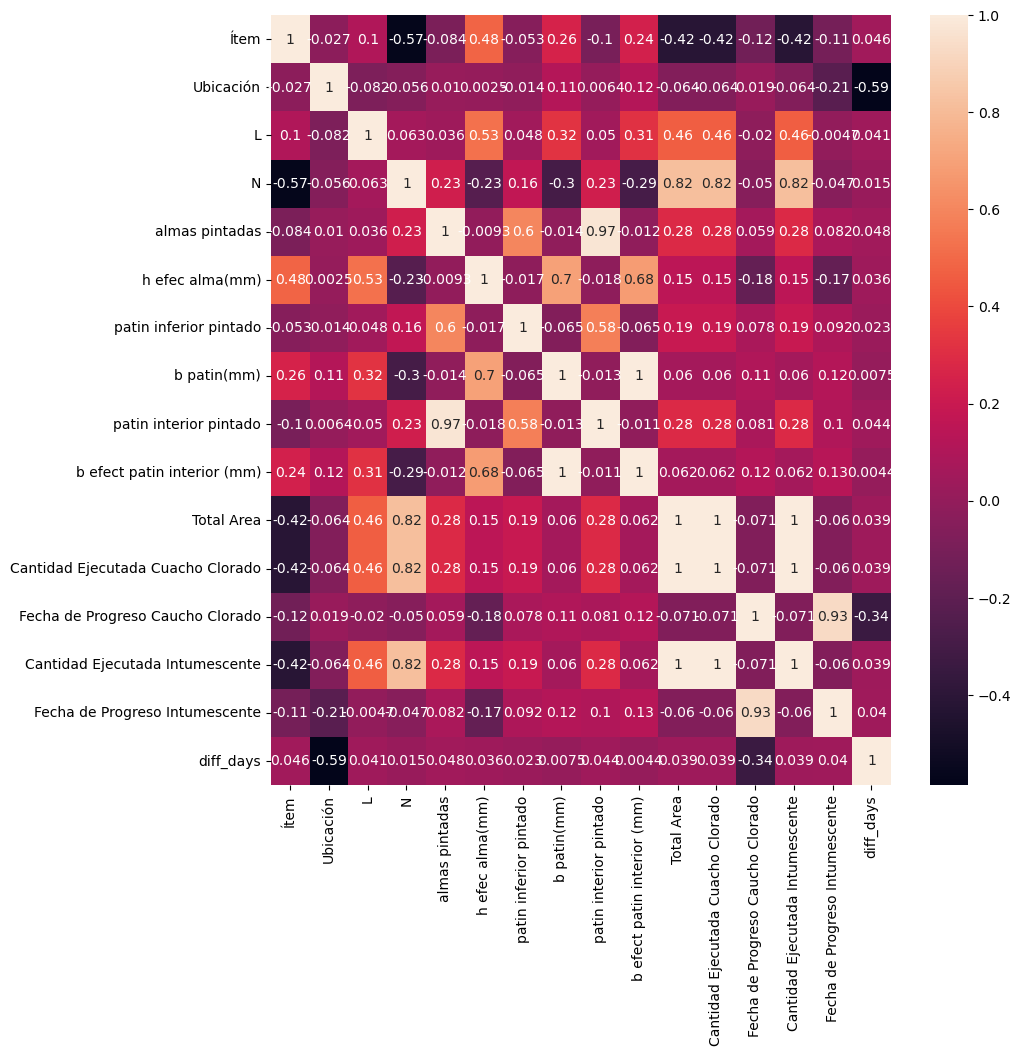

In [562]:
## Correlation
plt.figure(figsize=(10,10))
correlation= sns.heatmap(paint_df_model.corr(), annot= True)
#paint_df_model.corr()

In [563]:
paint_df_model.drop(paint_df_model.columns[[6,7,9,11,12,13,14]],axis=1, inplace=True)
paint_df_model.info()


<class 'pandas.core.frame.DataFrame'>
Index: 657 entries, 0 to 1112
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ítem                    657 non-null    int32  
 1   Ubicación               657 non-null    int32  
 2   L                       657 non-null    float64
 3   N                       657 non-null    float64
 4   almas pintadas          657 non-null    float64
 5   h efec alma(mm)         657 non-null    int64  
 6   patin interior pintado  657 non-null    float64
 7   Total Area              657 non-null    float64
 8   diff_days               657 non-null    int64  
dtypes: float64(5), int32(2), int64(2)
memory usage: 46.2 KB


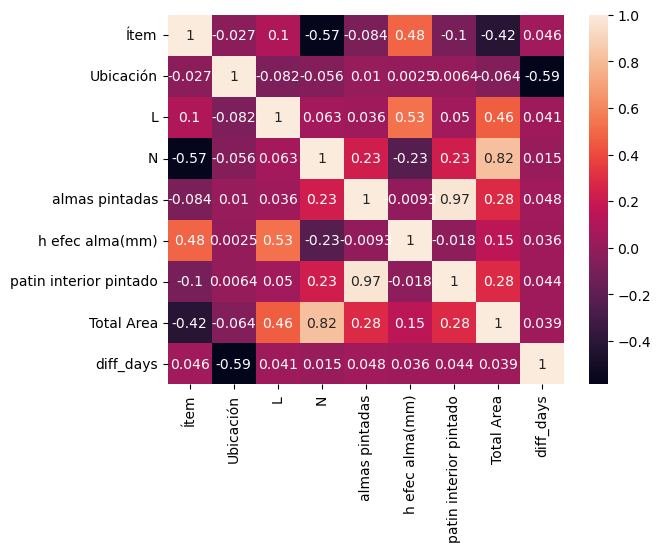

In [564]:
correlation= sns.heatmap(paint_df_model.corr(), annot= True)

In [565]:
#paint_df_model will be the first model trained with out any normalization or feature engineering
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
modelo_1=paint_df_model.copy()
modelo_2=paint_df_model.copy()
modelo_3=paint_df_model.copy()
modelo_4=paint_df_model.copy()
y=modelo_1.iloc[:,[-1]]
X=modelo_1.iloc[:,[0,1,2,3,4,5,6,7]]


In [566]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=1)

In [567]:
lr= LinearRegression()
modelo_1_trained= lr.fit(X_train, y_train)
modelo_1_trained

LinearRegression()

In [568]:
## Importamos las metricas de error que vamos a evaluar.
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score # R2
from sklearn.metrics import confusion_matrix # R2
from sklearn.metrics import classification_report

In [569]:
## Predecimos los valores
y_pred= lr.predict(X_valid)
pred_1= mean_absolute_error(y_pred,y_valid)
pred_1

2.315312558703732

In [570]:
pred_2= mean_squared_error(y_pred,y_valid)
pred_2

8.67480105131724

In [571]:
pred_3= r2_score(y_pred,y_valid)
pred_3

-0.7837589029261838

In [572]:
y_valid

,diff_days
631,13
1050,3
1110,8
400,6
308,5
...,...
541,8
667,13
613,11
364,6


In [573]:
y=modelo_2.iloc[:,[-1]]
X=modelo_2.iloc[:,[0,1,2,3,4,5,6,7]]
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=1)
rfc= RandomForestClassifier(n_estimators= 10)
modelo_2_trained= rfc.fit(X_train, y_train)
modelo_2_trained

C:\Users\chris\anaconda3\envs\tensor_f\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=10)

In [574]:
y_pred= rfc.predict(X_valid)
pred_1= mean_absolute_error(y_pred,y_valid)
pred_2= mean_squared_error(y_pred,y_valid)
pred_3= r2_score(y_pred,y_valid)
print(pred_1,pred_2,pred_3)

1.8106060606060606 7.840909090909091 0.3253733112111874


In [575]:
y=modelo_3.iloc[:,[-1]]
X=modelo_3.iloc[:,[0,1,2,3,4,5,6,7]]
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=1)




## Normalization and Feature Engineering
# I will use and STANDAR SCALER AND SELECT KBEST
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_valid= sc.transform(X_valid)
#y_train= sc.fit(y_train)
print([[X_valid]])
filtro= SelectKBest(score_func=f_regression, k=2)
X_filtrado = filtro.fit_transform(X,y)
print(X_filtrado)

[[array([[ 0.94425315, -1.38801524,  0.24504999, ..., -0.10666626,
         0.4145781 , -0.39978635],
       [-0.48602066,  0.84591486,  0.24504999, ..., -0.79109285,
         0.4145781 , -0.45778814],
       [-0.48602066,  0.84591486, -0.53158633, ..., -0.79109285,
         0.4145781 , -0.58582402],
       ...,
       [-0.48602066, -1.38801524,  0.20190353, ..., -0.79109285,
        -2.41209076, -0.65554959],
       [ 1.08728053,  1.29270089,  0.20190353, ...,  0.53669474,
         0.4145781 , -0.35412536],
       [-0.48602066, -0.04765718,  0.24504999, ..., -0.79109285,
         0.4145781 , -0.45778814]])]]
[[3. 1.]
 [3. 2.]
 [3. 2.]
 ...
 [6. 2.]
 [6. 2.]
 [6. 2.]]


C:\Users\chris\anaconda3\envs\tensor_f\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [576]:
embedding_model = RandomForestClassifier(n_estimators= 100, random_state=42)
embedding_model.fit(X,y)
importance= embedding_model.feature_importances_
print(importance)

[0.09865645 0.22497003 0.21933953 0.06830324 0.01646999 0.09921596
 0.01859808 0.25444672]


C:\Users\chris\anaconda3\envs\tensor_f\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [577]:
r= LinearRegression()
modelo_3_trained= lr.fit(X_train, y_train)
modelo_3_trained


LinearRegression()

In [578]:
y_pred= lr.predict(X_valid)
pred_3= mean_absolute_error(y_pred,y_valid)
pred_2= mean_squared_error(y_pred,y_valid)
pred_3= r2_score(y_pred,y_valid)
print(pred_1,pred_2,pred_3)

1.8106060606060606 8.674801051317242 -0.7837589029261827


In [579]:
y=modelo_4.iloc[:,[-1]]
X=modelo_4.iloc[:,[0,1,2,3,4,5,6,7]]
embedding_model = RandomForestClassifier(n_estimators= 100, random_state=42)
embedding_model.fit(X,y)
importance= embedding_model.feature_importances_
print(importance)






C:\Users\chris\anaconda3\envs\tensor_f\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[0.09865645 0.22497003 0.21933953 0.06830324 0.01646999 0.09921596
 0.01859808 0.25444672]


In [580]:
y=modelo_4.iloc[:,[-1]]
X=modelo_4.iloc[:,[1,2,7]]
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=1)

In [581]:
## Normalization and Feature Engineering
# I will use and STANDAR SCALER AND SELECT KBEST
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_valid= sc.transform(X_valid)
filtro= SelectKBest(score_func=f_regression, k=2)
X_filtrado = filtro.fit_transform(X,y)
print(X_filtrado)

[[ 3.    3.94]
 [ 3.   12.25]
 [ 3.    9.3 ]
 ...
 [ 6.    6.7 ]
 [ 6.    9.25]
 [ 6.    1.21]]


C:\Users\chris\anaconda3\envs\tensor_f\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [582]:
lr= LinearRegression()
modelo_3_trained= lr.fit(X_train, y_train)
modelo_3_trained


LinearRegression()

In [583]:
y_pred= lr.predict(X_valid)
pred_3= mean_absolute_error(y_pred,y_valid)
pred_2= mean_squared_error(y_pred,y_valid)
pred_3= r2_score(y_pred,y_valid)
print(pred_1,pred_2,pred_3)

1.8106060606060606 8.814757826812373 -0.9214218059254886
